# Librerias

In [5]:
!pip install sweetviz
!pip install vaderSentiment

import os
from pathlib import Path
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
import sweetviz as sv

from textblob import TextBlob
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import string

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 4.8 MB/s 


 #  Datasets

In [ ]:
%%time
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/review_pelis.csv', sep='|',encoding="utf-8", error_bad_lines=False)


In [ ]:
stop_w =["0","1","2","3","4","5","6","7","8","9","_","a","actualmente","acuerdo","adelante","ademas","además","adrede","afirmó","agregó","ahi","ahora",
         "ahí","al","algo","alguna","algunas","alguno","algunos","algún","alli","allí","alrededor","ambos","ampleamos","antano","antaño","ante",
         "anterior","antes","apenas","aproximadamente","aquel","aquella","aquellas","aquello","aquellos","aqui","aquél","aquélla","aquéllas","aquéllos",
         "aquí","arriba","arribaabajo","aseguró","asi","así","atras","aun","aunque","ayer","añadió","aún","b","bajo","bastante","bien","breve","buen",
         "buena","buenas","bueno","buenos","c","cada","casi","cerca","cierta","ciertas","cierto","ciertos","cinco","claro","comentó","como","con","conmigo"
         ,"conocer","conseguimos","conseguir","considera","consideró","consigo","consigue","consiguen","consigues","contigo","contra","cosas","creo","cual",
         "cuales","cualquier","cuando","cuanta","cuantas","cuanto","cuantos","cuatro","cuenta","cuál","cuáles","cuándo","cuánta","cuántas","cuánto","cuántos",
         "cómo","d","da","dado","dan","dar","de","debajo","debe","deben","debido","decir","dejó","del","delante","demasiado","demás","dentro","deprisa","desde",
         "despacio","despues","después","detras","detrás","dia","dias","dice","dicen","dicho","dieron","diferente","diferentes","dijeron","dijo","dio","donde",
         "dos","durante","día","días","dónde","e","ejemplo","el","ella","ellas","ello","ellos","embargo","empleais","emplean","emplear","empleas","empleo",
         "en","encima","encuentra","enfrente","enseguida","entonces","entre","era","erais","eramos","eran","eras","eres","es","esa","esas","ese","eso","esos",
         "esta","estaba","estabais","estaban","estabas","estad","estada","estadas","estado","estados","estais","estamos","estan","estando","estar",
         "estaremos","estará","estarán","estarás","estaré","estaréis","estaría","estaríais","estaríamos","estarían","estarías","estas","este","estemos",
         "esto","estos","estoy","estuve","estuviera","estuvierais","estuvieran","estuvieras","estuvieron","estuviese","estuvieseis","estuviesen","estuvieses",
         "estuvimos","estuviste","estuvisteis","estuviéramos","estuviésemos","estuvo","está","estábamos","estáis","están","estás","esté","estéis","estén",
         "estés","ex","excepto","existe","existen","explicó","expresó","f","fin","final","fue","fuera","fuerais","fueran","fueras","fueron","fuese",
         "fueseis","fuesen","fueses","fui","fuimos","fuiste","fuisteis","fuéramos","fuésemos","g","general","gran","grandes","gueno","h","ha","haber",
         "habia","habida","habidas","habido","habidos","habiendo","habla","hablan","habremos","habrá","habrán","habrás","habré","habréis","habría",
         "habríais","habríamos","habrían","habrías","habéis","había","habíais","habíamos","habían","habías","hace","haceis","hacemos","hacen","hacer",
         "hacerlo","haces","hacia","haciendo","hago","han","has","hasta","hay","haya","hayamos","hayan","hayas","hayáis","he","hecho","hemos","hicieron",
         "hizo","horas","hoy","hube","hubiera","hubierais","hubieran","hubieras","hubieron","hubiese","hubieseis","hubiesen","hubieses","hubimos","hubiste",
         "hubisteis","hubiéramos","hubiésemos","hubo","i","igual","incluso","indicó","informo","informó","intenta","intentais","intentamos","intentan",
         "intentar","intentas","intento","ir","j","junto","k","l","la","lado","largo","las","le","lejos","les","llegó","lleva","llevar","lo","los","luego",
         "lugar","m","mal","manera","manifestó","mas","mayor","me","mediante","medio","mejor","mencionó","menos","menudo","mi","mia","mias","mientras",
         "mio","mios","mis","misma","mismas","mismo","mismos","modo","momento","mucha","muchas","mucho","muchos","muy","más","mí","mía","mías","mío",
         "míos","n","nada","nadie","ni","ninguna","ningunas","ninguno","ningunos","ningún","no","nos","nosotras","nosotros","nuestra","nuestras","nuestro",
         "nuestros","nueva","nuevas","nuevo","nuevos","nunca","o","ocho","os","otra","otras","otro","otros","p","pais","para","parece","parte","partir",
         "pasada","pasado","paìs","peor","pero","pesar","poca","pocas","poco","pocos","podeis","podemos","poder","podria","podriais","podriamos","podrian",
         "podrias","podrá","podrán","podría","podrían","poner","por","por qué","porque","posible","primer","primera","primero","primeros","principalmente",
         "pronto","propia","propias","propio","propios","proximo","próximo","próximos","pudo","pueda","puede","pueden","puedo","pues","q","qeu","que","quedó",
         "queremos","quien","quienes","quiere","quiza","quizas","quizá","quizás","quién","quiénes","qué","r","raras","realizado","realizar","realizó",
         "repente","respecto","s","sabe","sabeis","sabemos","saben","saber","sabes","sal","salvo","se","sea","seamos","sean","seas","segun","segunda",
         "segundo","según","seis","ser","sera","seremos","será","serán","serás","seré","seréis","sería","seríais","seríamos","serían","serías","seáis",
         "señaló","si","sido","siempre","siendo","siete","sigue","siguiente","sin","sino","sobre","sois","sola","solamente","solas","solo","solos","somos",
         "son","soy","soyos","su","supuesto","sus","suya","suyas","suyo","suyos","sé","sí","sólo","t","tal","tambien","también","tampoco","tan","tanto",
         "tarde","te","temprano","tendremos","tendrá","tendrán","tendrás","tendré","tendréis","tendría","tendríais","tendríamos","tendrían","tendrías",
         "tened","teneis","tenemos","tener","tenga","tengamos","tengan","tengas","tengo","tengáis","tenida","tenidas","tenido","tenidos","teniendo",
         "tenéis","tenía","teníais","teníamos","tenían","tenías","tercera","ti","tiempo","tiene","tienen","tienes","toda","todas","todavia","todavía",
         "todo","todos","total","trabaja","trabajais","trabajamos","trabajan","trabajar","trabajas","trabajo","tras","trata","través","tres","tu","tus",
         "tuve","tuviera","tuvierais","tuvieran","tuvieras","tuvieron","tuviese","tuvieseis","tuviesen","tuvieses","tuvimos","tuviste","tuvisteis",
         "tuviéramos","tuviésemos","tuvo","tuya","tuyas","tuyo","tuyos","tú","u","ultimo","un","una","unas","uno","unos","usa","usais","usamos",
         "usan","usar","usas","uso","usted","ustedes","v","va","vais","valor","vamos","van","varias","varios","vaya","veces","ver","verdad",
         "verdadera","verdadero","vez","vosotras","vosotros","voy","vuestra","vuestras","vuestro","vuestros","w","x","y","ya","yo","z","él",
         "éramos","ésa","ésas","ése","ésos","ésta","éstas","éste","éstos","última","últimas","último","últimos"]
print(stop_w)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '_', 'a', 'actualmente', 'acuerdo', 'adelante', 'ademas', 'además', 'adrede', 'afirmó', 'agregó', 'ahi', 'ahora', 'ahí', 'al', 'algo', 'alguna', 'algunas', 'alguno', 'algunos', 'algún', 'alli', 'allí', 'alrededor', 'ambos', 'ampleamos', 'antano', 'antaño', 'ante', 'anterior', 'antes', 'apenas', 'aproximadamente', 'aquel', 'aquella', 'aquellas', 'aquello', 'aquellos', 'aqui', 'aquél', 'aquélla', 'aquéllas', 'aquéllos', 'aquí', 'arriba', 'arribaabajo', 'aseguró', 'asi', 'así', 'atras', 'aun', 'aunque', 'ayer', 'añadió', 'aún', 'b', 'bajo', 'bastante', 'bien', 'breve', 'buen', 'buena', 'buenas', 'bueno', 'buenos', 'c', 'cada', 'casi', 'cerca', 'cierta', 'ciertas', 'cierto', 'ciertos', 'cinco', 'claro', 'comentó', 'como', 'con', 'conmigo', 'conocer', 'conseguimos', 'conseguir', 'considera', 'consideró', 'consigo', 'consigue', 'consiguen', 'consigues', 'contigo', 'contra', 'cosas', 'creo', 'cual', 'cuales', 'cualquier', 'cuando', 'cuanta', 

In [1]:
df.head()

NameError: ignored

# ETL

In [ ]:
%%time

## En este proceso limpiamos y eliminamos los puntos de acentuacion y espacios en blancos extras de las calumnas a trabajar.

def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

# Cleaning the text in the review column
df['review_text'] = df['review_text'].apply(clean)
df['review_title'] = df['review_title'].apply(clean)


string.punctuation
df.columns = df.columns.str.strip() #eliminar espacios blancos extras

def remove_punctuation(text):
    no_punct = [words for words in text if words not in string.punctuation]
    words_wo_punct =''.join(no_punct)
    return words_wo_punct

df['film_name'] = df['film_name'].apply(lambda x: remove_punctuation(str(x)))

df['film_name'] = df['film_name'].str.lower()


## Libre Nombramiento
df['film_name'] = df['film_name'].str.replace("í", "i")
df['film_name'] = df['film_name'].str.replace("á", "a") 
df['film_name'] = df['film_name'].str.replace("é", "e") 
df['film_name'] = df['film_name'].str.replace("ó", "o") 
df['film_name'] = df['film_name'].str.replace("ú", "u") 


string.punctuation
df.columns = df.columns.str.strip() #eliminar espacios blancos extras

def remove_punctuation(text):
    no_punct = [words for words in text if words not in string.punctuation]
    words_wo_punct =''.join(no_punct)
    return words_wo_punct

df['review_title'] = df['review_title'].apply(lambda x: remove_punctuation(str(x)))

df['review_title'] = df['review_title'].str.lower()


## Libre Nombramiento
df['review_title'] = df['review_title'].str.replace("í", "i")
df['review_title'] = df['review_title'].str.replace("á", "a") 
df['review_title'] = df['review_title'].str.replace("é", "e") 
df['review_title'] = df['review_title'].str.replace("ó", "o") 
df['review_title'] = df['review_title'].str.replace("ú", "u") 

string.punctuation
df.columns = df.columns.str.strip() #eliminar espacios blancos extras

def remove_punctuation(text):
    no_punct = [words for words in text if words not in string.punctuation]
    words_wo_punct =''.join(no_punct)
    return words_wo_punct

df['review_text'] = df['review_text'].apply(lambda x: remove_punctuation(str(x)))

df['review_text'] = df['review_text'].str.lower()


## Libre Nombramiento
df['review_text'] = df['review_text'].str.replace("í", "i")
df['review_text'] = df['review_text'].str.replace("á", "a") 
df['review_text'] = df['review_text'].str.replace("é", "e") 
df['review_text'] = df['review_text'].str.replace("ó", "o") 
df['review_text'] = df['review_text'].str.replace("ú", "u") 

CPU times: total: 3.88 s
Wall time: 3.89 s


In [ ]:
df = df[['film_name','gender','film_avg_rate','review_rate','review_title','review_text']]
print(df['review_text'].head(10))

0    la mayor virtud de esta pel cula es su existen...
1    no soy un experto cin filo pero pocas veces me...
2    si no eres un incondicional del humor estilo t...
3    no s qu est pasando si la gente se deja llevar...
4    pero cuando amanece y me quedo solo siento en ...
5    la llegada de rafa a euskadi es como ponerse a...
6    el nivel del cine y lo peor la capacidad intel...
7    es triste ver una pel cula como sta y escuchar...
8    puedo entender que torrente i y ii y lo imposi...
9     ahivalohostia txomin qu mont n de gente ri nd...
Name: review_text, dtype: object


# Analisis Descriptivo

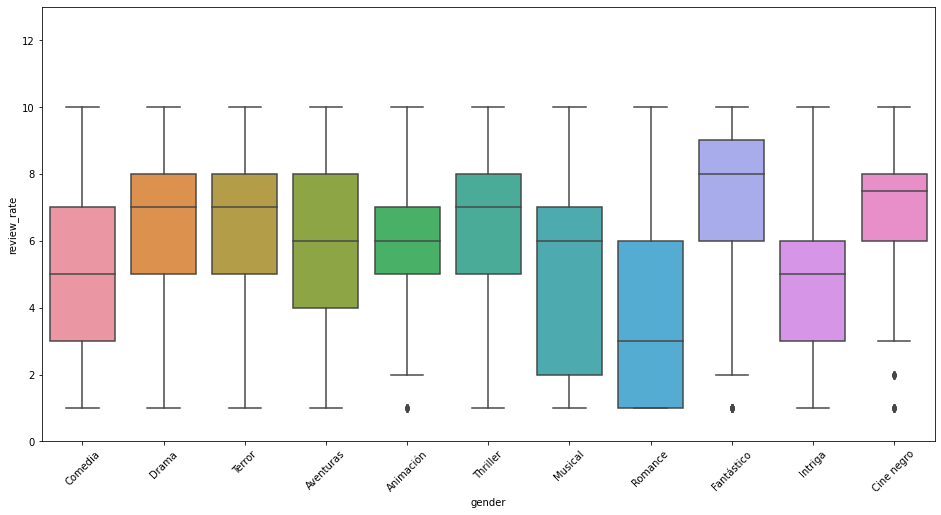

In [ ]:
var = 'gender'
max_s = df['review_rate'].max()
data = pd.concat([df['review_rate'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="review_rate", data=data)
fig.axis(ymin=0, ymax=13);
plt.xticks(rotation=45);

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



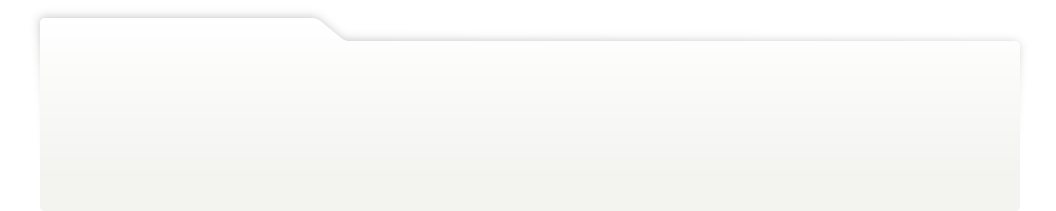
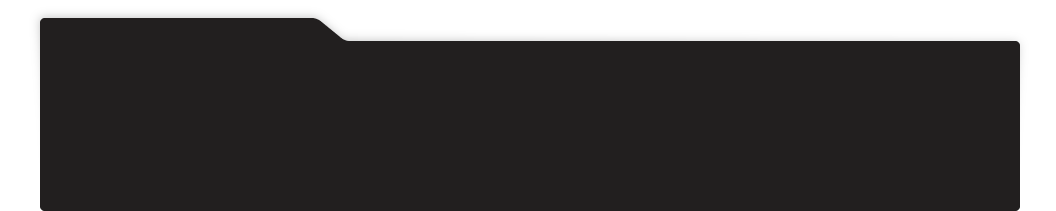
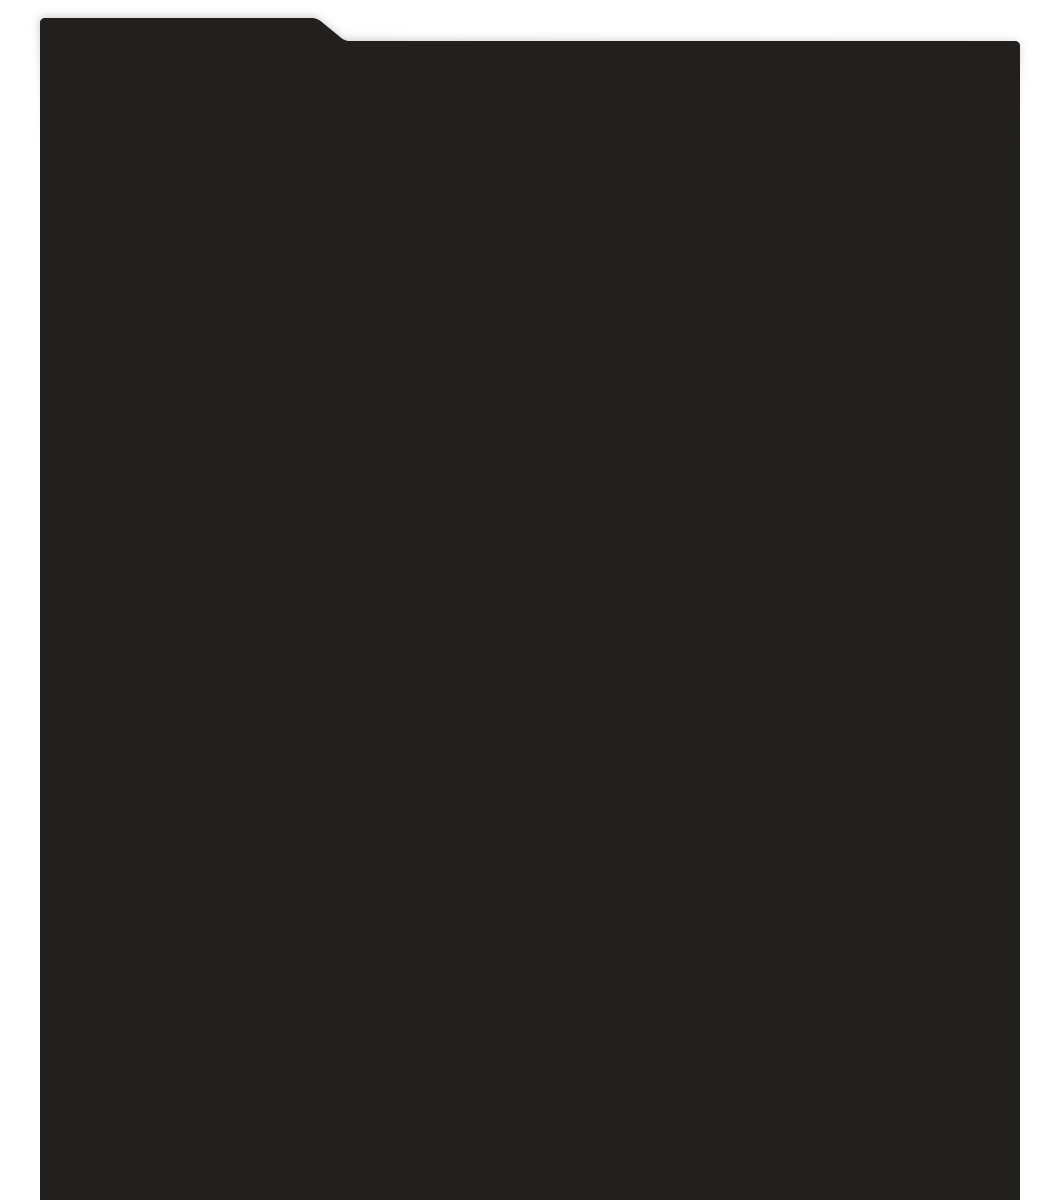
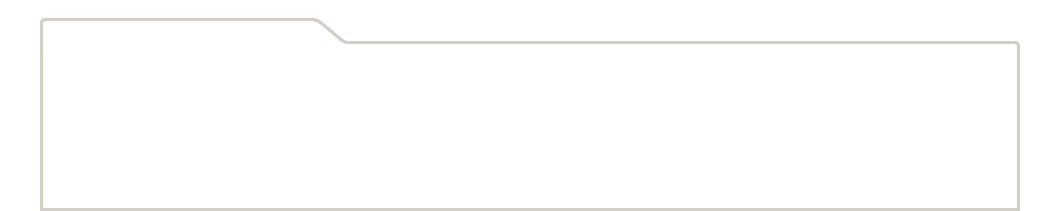
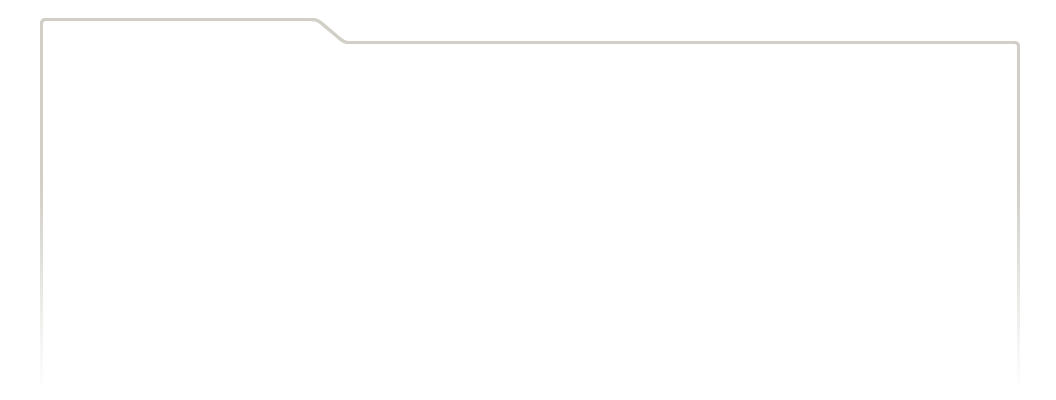
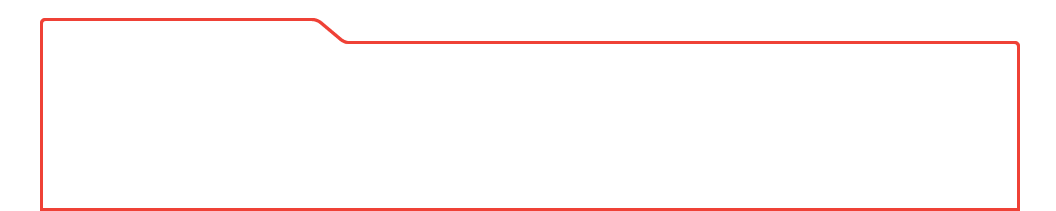
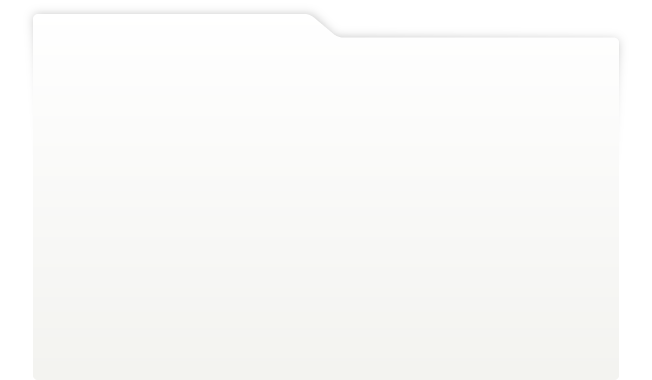
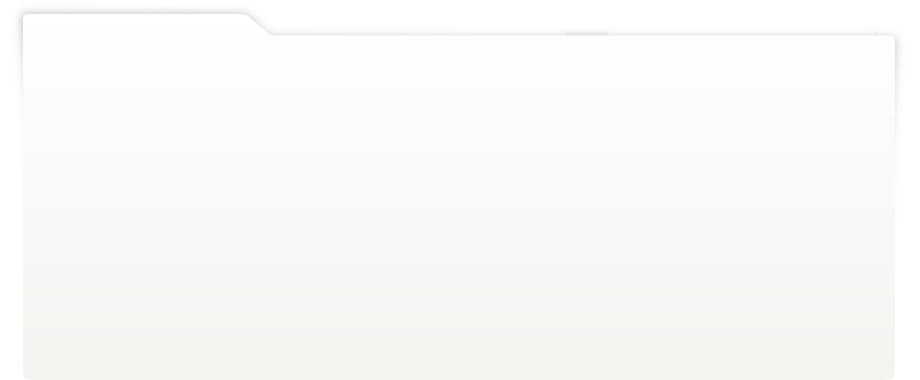
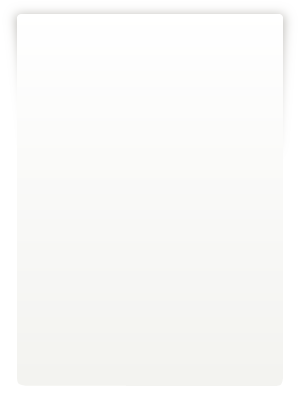
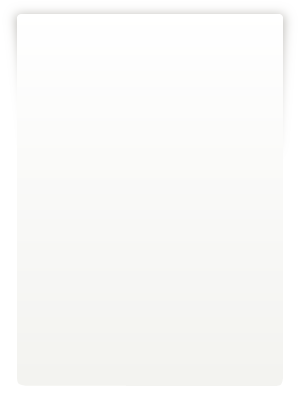
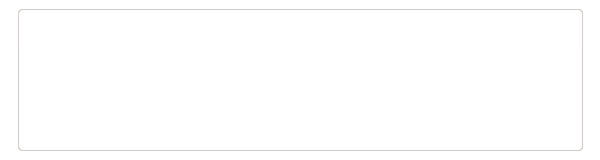
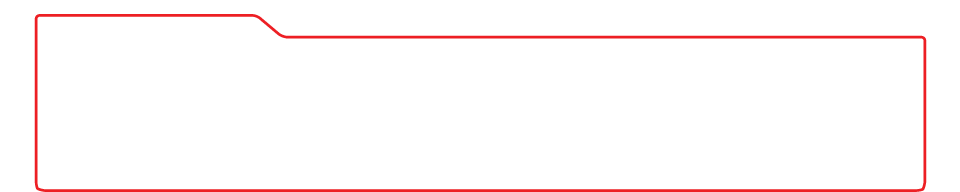
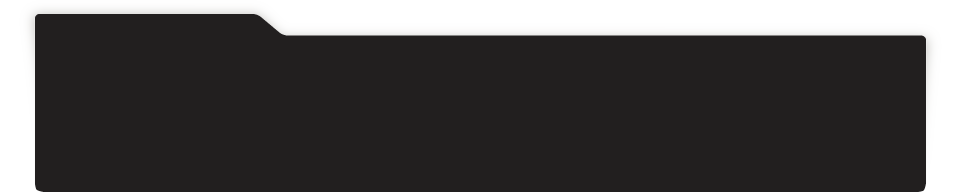
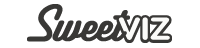
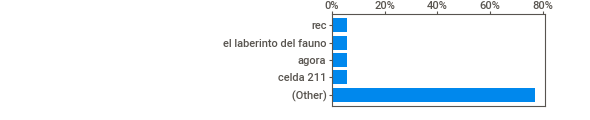
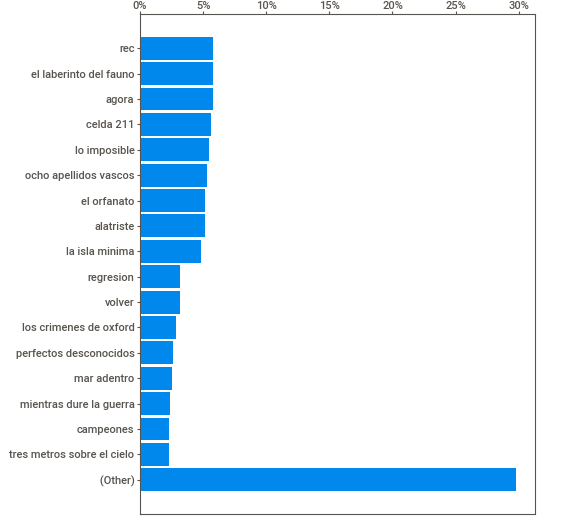
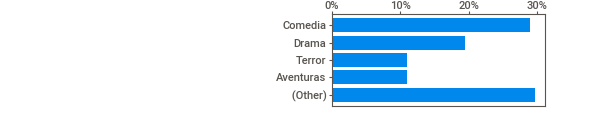
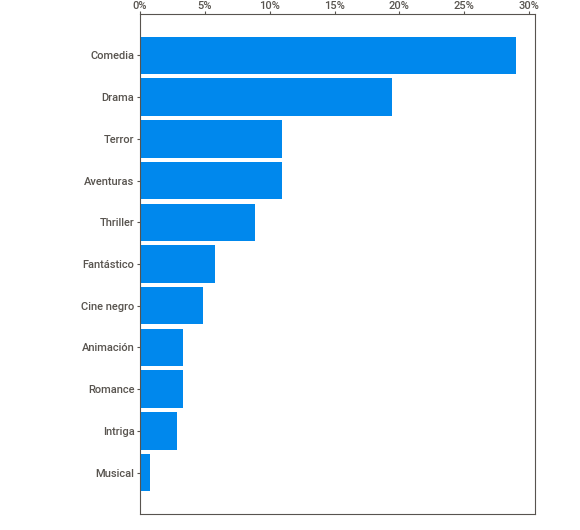
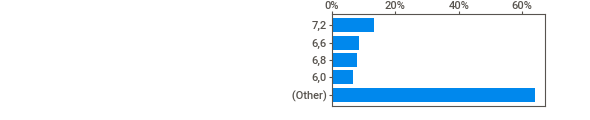
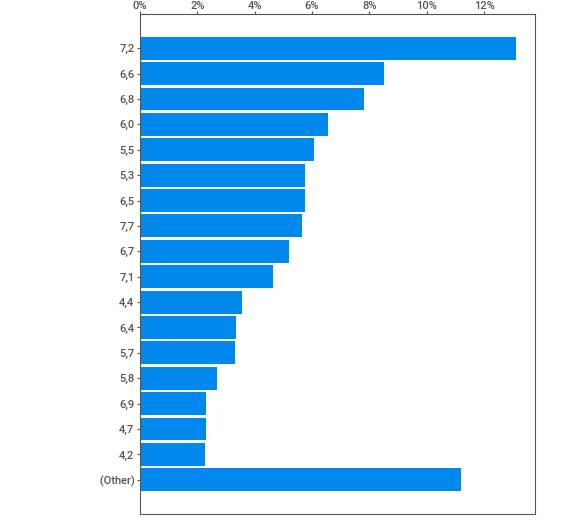
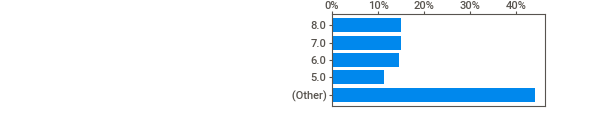
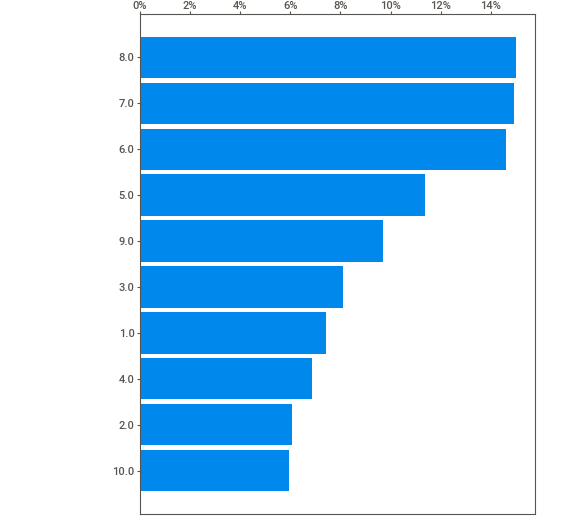
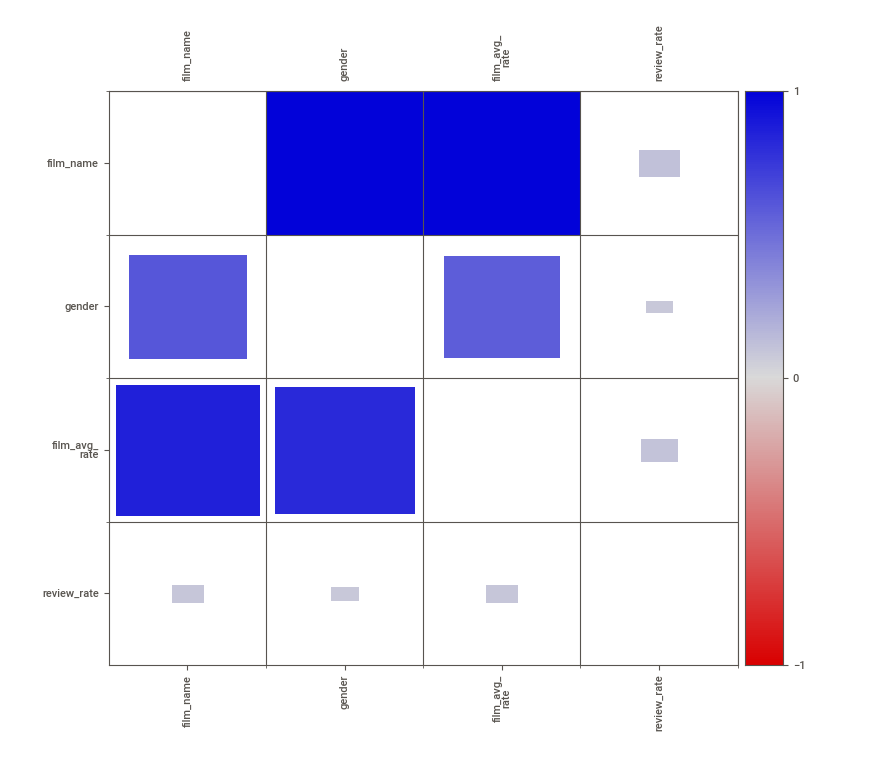
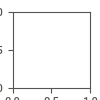

CPU times: total: 1.3 s
Wall time: 1.68 s


In [ ]:
%%time
my_report = sv.analyze(df)
my_report.show_html('Report.html')
my_report.show_notebook()

In [ ]:
gb_pel = df.groupby(['gender']).review_rate.agg([len, np.min,\
                                                               np.max,np.mean]).rename(columns={'len': 'Cant. Votos',\
                                                                                                'amin': 'Rate Minimo',\
                                                                                               'amax': 'Rate Maximo',\
                                                                                               'mean': 'Rate Promedio'})

gb_pel.head(20).sort_values(by='Rate Promedio', ascending=False )

,Cant. Votos,Rate Minimo,Rate Maximo,Rate Promedio
gender,,,,
Fantástico,495,1.0,10.0,7.242424
Cine negro,418,1.0,10.0,6.877990
Drama,1671,1.0,10.0,6.492519
Thriller,762,1.0,10.0,6.366142
Terror,941,1.0,10.0,6.211477
Animación,284,1.0,10.0,5.640845
Aventuras,939,1.0,10.0,5.637913
Comedia,2495,1.0,10.0,5.205293
Musical,65,1.0,10.0,5.015385


In [ ]:
gb_pel = df.groupby(['film_name']).review_rate.agg([len, np.min,\
                                                               np.max,np.mean]).rename(columns={'len': 'Cant. Votos',\
                                                                                                'amin': 'Rate Minimo',\
                                                                                               'amax': 'Rate Maximo',\
                                                                                               'mean': 'Rate Promedio'})

gb_pel.head(20).sort_values(by='Cant. Votos', ascending=False )

,Cant. Votos,Rate Minimo,Rate Maximo,Rate Promedio
film_name,,,,
el laberinto del fauno,495,1.0,10.0,7.242424
agora,494,1.0,10.0,6.366397
celda 211,487,1.0,10.0,7.285421
el orfanato,446,1.0,10.0,6.154709
alatriste,445,1.0,10.0,4.829213
la isla minima,418,1.0,10.0,6.877990
campeones,199,1.0,10.0,6.834171
las 13 rosas,140,1.0,10.0,6.157143
airbag,98,1.0,10.0,5.714286


In [ ]:
#Usando la libreria extraemos y limpiamos las palabras no necesarias para afinar mas el modelo a la hora de interpretar el sentimiento


from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words=stop_w)

df['review_title'] = df['review_title'].fillna('')

tfidf_matrix = tfidf.fit_transform(df['review_title'])

tfidf_matrix.shape

(8600, 6690)

In [ ]:
def getSIA(text):
    """ Esta funcion permite etiquetar las peliculas acorde al sentimiento expresado en el review
    """
    sia = SentimentIntensityAnalyzer()
    sentiment= sia.polarity_scores(text)
    return sentiment

compound=[]
neg=[]
pos=[]
neu=[]
SIA=0

for i in range (0, len(df['review_title'])):
    SIA= getSIA(df['review_title'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    pos.append(SIA['pos'])
    neu.append(SIA['neu'])

df['compound'] = compound
df['neg'] = neg
df['pos'] = pos
df['neu'] = neu

In [ ]:
print(df[['neg','pos','neu','review_title']].tail(50))

        neg    pos    neu                                       review_title
8550  0.000  0.000  1.000                     cuando las cosas se hacen bien
8551  0.000  0.000  1.000                reconcili ndome con el cine espa ol
8552  0.216  0.000  0.784       el asesino en serie que no convence del todo
8553  0.000  0.000  1.000                                  ecos de louisiana
8554  0.289  0.000  0.711                      espa oles franco no ha muerto
8555  0.000  0.000  1.000                                  memoria historica
8556  0.000  0.423  0.577                         espectaculo vital y visual
8557  0.000  0.318  0.682                              gran thriller espa ol
8558  0.000  0.000  1.000                        desde el principio al final
8559  0.000  0.000  1.000                 cortante y afilada como una navaja
8560  0.000  0.000  1.000                                          marismas 
8561  0.000  0.000  1.000                               esto es cine espa ol

# Clusterizacion de las Clasificaciones

In [ ]:
#Agrupamos los resultados por funcion y Genero para ver la Estimacion
gb_df = df.groupby(['film_name','review_title']).agg({'film_name': 'count','neg': 'mean','pos': 'mean','neu': 'mean'})\
.rename(columns={'film_name':'Cantidad de Titulos'}).reset_index().sort_values('Cantidad de Titulos',ascending=False)       
gb_df['Porcentaje'] = (gb_df['Cantidad de Titulos'] / gb_df['Cantidad de Titulos'].sum()) * 100
gb_df

,film_name,review_title,Cantidad de Titulos,neg,pos,neu,Porcentaje
2048,el laberinto del fauno,el laberinto del fauno,10,0.000,0.000,1.000,0.116279
4104,lo imposible,lo imposible,9,0.000,0.000,1.000,0.104651
5459,ocho apellidos vascos,ocho apellidos vascos,7,0.000,0.000,1.000,0.081395
6809,regresion,regresi n,6,0.000,0.000,1.000,0.069767
1418,celda 211,celda,6,0.000,0.000,1.000,0.069767
...,...,...,...,...,...,...,...
2814,el orfanato,sin contar nada nuevo,1,0.545,0.000,0.455,0.011628
2813,el orfanato,simplemente genial,1,0.000,0.737,0.263,0.011628
2812,el orfanato,simplemente genial,1,0.000,0.737,0.263,0.011628
2811,el orfanato,sigue buscando,1,0.000,0.000,1.000,0.011628


In [ ]:
def cal_movie (df):
    
    """ Esta funcion permite etiquetar las peliculas acorde a su sentimiento
    """
        
    if df['neg'] > df['pos']:
        
        return 'Mala'
    
    elif df['pos'] > df['neg']:
        
        return 'Buena'
    else:
        
        return 'Regular'

df['Calificacion Pelicula'] = df.apply(cal_movie, axis = 1)

In [ ]:
#Agrupamos los resultados por funcion y Genero para ver la Estimacion
gb_df = df.groupby(['film_name','review_title','Calificacion Pelicula']).agg({'film_name': 'count','neg': 'mean','pos': 'mean','neu': 'mean'})\
.rename(columns={'film_name':'Cantidad de Titulos'}).reset_index().sort_values('Cantidad de Titulos',ascending=False)       
gb_df['Porcentaje'] = (gb_df['Cantidad de Titulos'] / gb_df['Cantidad de Titulos'].sum()) * 100
gb_df

,film_name,review_title,Calificacion Pelicula,Cantidad de Titulos,neg,pos,neu,Porcentaje
2048,el laberinto del fauno,el laberinto del fauno,Regular,10,0.000,0.000,1.000,0.116279
4104,lo imposible,lo imposible,Regular,9,0.000,0.000,1.000,0.104651
5459,ocho apellidos vascos,ocho apellidos vascos,Regular,7,0.000,0.000,1.000,0.081395
6809,regresion,regresi n,Regular,6,0.000,0.000,1.000,0.069767
1418,celda 211,celda,Regular,6,0.000,0.000,1.000,0.069767
...,...,...,...,...,...,...,...,...
2814,el orfanato,sin contar nada nuevo,Mala,1,0.545,0.000,0.455,0.011628
2813,el orfanato,simplemente genial,Buena,1,0.000,0.737,0.263,0.011628
2812,el orfanato,simplemente genial,Buena,1,0.000,0.737,0.263,0.011628
2811,el orfanato,sigue buscando,Regular,1,0.000,0.000,1.000,0.011628


In [ ]:
gb_df_p = gb_df.groupby(['Calificacion Pelicula']).agg({'Cantidad de Titulos': 'sum'})\
.rename(columns={'Cantidad de Titulos':'Cant. de Titulos'}).reset_index().sort_values('Cant. de Titulos',ascending=False)       
gb_df_p

,Calificacion Pelicula,Cant. de Titulos
2,Regular,7070
1,Mala,1086
0,Buena,444


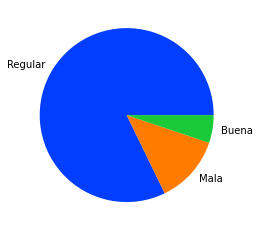

In [ ]:
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

#create pie chart
plt.pie(gb_df_p['Cant. de Titulos'], labels = gb_df_p['Calificacion Pelicula'], colors = palette_color)
plt.show()